In [15]:
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# Network Analysis
import networkx as nx
import community
import random

# Topic Modeling
from gensim import corpora, models

# Text Processing and preprocessing
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk import FreqDist
from wordcloud import WordCloud

# Sentiment Analysis Packages
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# Options
pd.options.display.max_columns = None
%matplotlib inline

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df = pd.read_csv("chatgpt.csv")
df.head()


,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1.617160e+18,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1.617160e+18,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1.617160e+18,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1.617150e+18,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1.617160e+18,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1.617160e+18,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1.617160e+18,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1.617160e+18,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1.617160e+18,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1.617160e+18,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [17]:
print(df.shape)
df.describe()

(50000, 20)


,Tweet Id,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,hastag_counts
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,1.617493e+18,0.929160,1.498540,9.696520,0.219540,1.617205e+18,0.783320
std,1.725759e+14,23.251942,46.030518,313.527348,10.356432,1.005083e+16,1.975056
min,1.617160e+18,0.000000,0.000000,0.000000,0.000000,6.493610e+17,0.000000
25%,1.617350e+18,0.000000,0.000000,0.000000,0.000000,1.617300e+18,0.000000
50%,1.617530e+18,0.000000,0.000000,0.000000,0.000000,1.617500e+18,0.000000
75%,1.617620e+18,1.000000,0.000000,2.000000,0.000000,1.617610e+18,1.000000
max,1.617780e+18,3098.000000,6815.000000,56073.000000,1947.000000,1.617780e+18,28.000000


In [18]:
def summary(df):
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    return summary

summary(df)

,index,dtypes,missing,Uniques
0,Datetime,object,0,41559
1,Tweet Id,float64,0,63
2,Text,object,0,49551
3,Username,object,0,38432
4,Permalink,object,0,50000
5,User,object,0,38432
6,Outlinks,object,30058,13769
7,CountLinks,object,30058,19485
8,ReplyCount,int64,0,108
9,RetweetCount,int64,0,138


Text(0.5, 1.0, 'Tpo 10 Languages in the Posts')

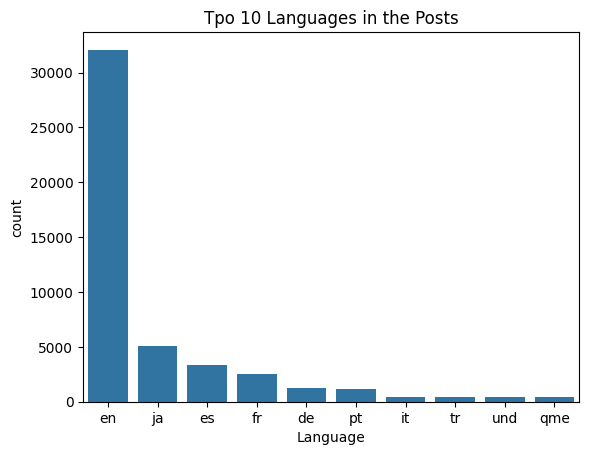

In [19]:
sns.countplot(data=df, x='Language', order=df['Language'].value_counts().index[:10])
plt.title('Tpo 10 Languages in the Posts')

Text Analytics

In [20]:
# Took all the posts in English.
df = df[df['Language'] == 'en']

cols_to_keep = ['Text', 'hashtags', 'ReactionCounts']
df = df.drop(columns=[col for col in df.columns if col not in cols_to_keep])

df = df.reset_index(drop=True)
print(df.shape)
df.head()

(32076, 1)


,Text
0,@AlexandrovnaIng Prohibition of ChatGPT has be...
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...
2,ChatGPT runs 10K Nvidia training GPUs with pot...
3,@SWENGDAD There is repetitive work in every jo...
4,I created a fictional jewelry brand using Chat...


Sentence Tokenizing

In [21]:
sent_tokenized = []

for text in df['Text'].values:
    tokens = nltk.sent_tokenize(text)
    sent_tokenized.append(tokens)

df['Sentence Tokenized'] = sent_tokenized
df.head()

,Text,Sentence Tokenized
0,@AlexandrovnaIng Prohibition of ChatGPT has be...,[@AlexandrovnaIng Prohibition of ChatGPT has b...
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,[Bow down to chatGPT 🫡..... https://t.co/ENTSz...
2,ChatGPT runs 10K Nvidia training GPUs with pot...,[ChatGPT runs 10K Nvidia training GPUs with po...
3,@SWENGDAD There is repetitive work in every jo...,[@SWENGDAD There is repetitive work in every j...
4,I created a fictional jewelry brand using Chat...,[I created a fictional jewelry brand using Cha...


Word Tokenizing

In [22]:
all_docs = df['Text'].values

exclude = set(string.punctuation)
tokenized = []
tokenizer = TweetTokenizer()
for doc in all_docs:
    tokens = tokenizer.tokenize(doc.lower())
    tokenized.append(''.join([ch for ch in ' '.join(tokens) if ch not in exclude]).split())

df['Word Tokenized'] = tokenized
df.head()

,Text,Sentence Tokenized,Word Tokenized
0,@AlexandrovnaIng Prohibition of ChatGPT has be...,[@AlexandrovnaIng Prohibition of ChatGPT has b...,"[alexandrovnaing, prohibition, of, chatgpt, ha..."
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,[Bow down to chatGPT 🫡..... https://t.co/ENTSz...,"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]"
2,ChatGPT runs 10K Nvidia training GPUs with pot...,[ChatGPT runs 10K Nvidia training GPUs with po...,"[chatgpt, runs, 10k, nvidia, training, gpus, w..."
3,@SWENGDAD There is repetitive work in every jo...,[@SWENGDAD There is repetitive work in every j...,"[swengdad, there, is, repetitive, work, in, ev..."
4,I created a fictional jewelry brand using Chat...,[I created a fictional jewelry brand using Cha...,"[i, created, a, fictional, jewelry, brand, usi..."


Removing Punctuations

In [23]:
def remove_punctuation(tokens):
    punctuations = string.punctuation
    tokens = [token.translate(str.maketrans('', '', punctuations)) for token in tokens]
    tokens = [token for token in tokens if len(token) > 1]
    return tokens

df['Punctuation Removed'] = df['Word Tokenized'].apply(remove_punctuation)
df.head()

,Text,Sentence Tokenized,Word Tokenized,Punctuation Removed
0,@AlexandrovnaIng Prohibition of ChatGPT has be...,[@AlexandrovnaIng Prohibition of ChatGPT has b...,"[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, of, chatgpt, ha..."
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,[Bow down to chatGPT 🫡..... https://t.co/ENTSz...,"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]"
2,ChatGPT runs 10K Nvidia training GPUs with pot...,[ChatGPT runs 10K Nvidia training GPUs with po...,"[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, w..."
3,@SWENGDAD There is repetitive work in every jo...,[@SWENGDAD There is repetitive work in every j...,"[swengdad, there, is, repetitive, work, in, ev...","[swengdad, there, is, repetitive, work, in, ev..."
4,I created a fictional jewelry brand using Chat...,[I created a fictional jewelry brand using Cha...,"[i, created, a, fictional, jewelry, brand, usi...","[created, fictional, jewelry, brand, using, ch..."


Removing StopWords and Other Unnecessaries

In [24]:
import nltk
nltk.download('stopwords')
sw = set(stopwords.words('english'))
sw.add('rt')
sw.add('...')

sw_removed = []
for j, sent in enumerate(df['Word Tokenized']):
    sw_removed.append([i for i in sent
                      if i not in sw
                      and len(i)>2
                      and (not i.startswith("http"))])

df['Stopword Removed'] = sw_removed
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed
0,@AlexandrovnaIng Prohibition of ChatGPT has be...,[@AlexandrovnaIng Prohibition of ChatGPT has b...,"[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, chatgpt, added,..."
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,[Bow down to chatGPT 🫡..... https://t.co/ENTSz...,"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]"
2,ChatGPT runs 10K Nvidia training GPUs with pot...,[ChatGPT runs 10K Nvidia training GPUs with po...,"[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, p..."
3,@SWENGDAD There is repetitive work in every jo...,[@SWENGDAD There is repetitive work in every j...,"[swengdad, there, is, repetitive, work, in, ev...","[swengdad, there, is, repetitive, work, in, ev...","[swengdad, repetitive, work, every, job, lots,..."
4,I created a fictional jewelry brand using Chat...,[I created a fictional jewelry brand using Cha...,"[i, created, a, fictional, jewelry, brand, usi...","[created, fictional, jewelry, brand, using, ch...","[created, fictional, jewelry, brand, using, ch..."


Part of Speech Tagging

In [25]:
nltk.download('averaged_perceptron_tagger')
pos_tags_list = []
for tokens in df['Word Tokenized']:
    pos_tags = nltk.pos_tag(tokens)
    pos_tags_list.append(pos_tags)
df['pos_tags'] = pos_tags_list
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Text,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags
0,@AlexandrovnaIng Prohibition of ChatGPT has be...,[@AlexandrovnaIng Prohibition of ChatGPT has b...,"[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, chatgpt, added,...","[(alexandrovnaing, VBG), (prohibition, NN), (o..."
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,[Bow down to chatGPT 🫡..... https://t.co/ENTSz...,"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB..."
2,ChatGPT runs 10K Nvidia training GPUs with pot...,[ChatGPT runs 10K Nvidia training GPUs with po...,"[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, p...","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidi..."
3,@SWENGDAD There is repetitive work in every jo...,[@SWENGDAD There is repetitive work in every j...,"[swengdad, there, is, repetitive, work, in, ev...","[swengdad, there, is, repetitive, work, in, ev...","[swengdad, repetitive, work, every, job, lots,...","[(swengdad, NN), (there, EX), (is, VBZ), (repe..."
4,I created a fictional jewelry brand using Chat...,[I created a fictional jewelry brand using Cha...,"[i, created, a, fictional, jewelry, brand, usi...","[created, fictional, jewelry, brand, using, ch...","[created, fictional, jewelry, brand, using, ch...","[(i, RB), (created, VBD), (a, DT), (fictional,..."


Word Stemming

In [26]:
stemmer = PorterStemmer()
def stemming(words):
    return [stemmer.stem(word) for word in words]

df['Word Stemmed'] = df['Stopword Removed'].apply(stemming)
df.head()

,Text,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags,Word Stemmed
0,@AlexandrovnaIng Prohibition of ChatGPT has be...,[@AlexandrovnaIng Prohibition of ChatGPT has b...,"[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, chatgpt, added,...","[(alexandrovnaing, VBG), (prohibition, NN), (o...","[alexandrovna, prohibit, chatgpt, ad, honor, c..."
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,[Bow down to chatGPT 🫡..... https://t.co/ENTSz...,"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB...","[bow, chatgpt]"
2,ChatGPT runs 10K Nvidia training GPUs with pot...,[ChatGPT runs 10K Nvidia training GPUs with po...,"[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, p...","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidi...","[chatgpt, run, 10k, nvidia, train, gpu, potent..."
3,@SWENGDAD There is repetitive work in every jo...,[@SWENGDAD There is repetitive work in every j...,"[swengdad, there, is, repetitive, work, in, ev...","[swengdad, there, is, repetitive, work, in, ev...","[swengdad, repetitive, work, every, job, lots,...","[(swengdad, NN), (there, EX), (is, VBZ), (repe...","[swengdad, repetit, work, everi, job, lot, sma..."
4,I created a fictional jewelry brand using Chat...,[I created a fictional jewelry brand using Cha...,"[i, created, a, fictional, jewelry, brand, usi...","[created, fictional, jewelry, brand, using, ch...","[created, fictional, jewelry, brand, using, ch...","[(i, RB), (created, VBD), (a, DT), (fictional,...","[creat, fiction, jewelri, brand, use, chatgpt,..."


Lemmatization

In [27]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if not token.is_punct and not token.is_space and token.is_alpha:
                if token.pos_ in allowed_postags:
                    new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return texts_out

df['Lemmatized Text'] = lemmatization(df['Text'])

df.head()

,Text,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags,Word Stemmed,Lemmatized Text
0,@AlexandrovnaIng Prohibition of ChatGPT has be...,[@AlexandrovnaIng Prohibition of ChatGPT has b...,"[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, chatgpt, added,...","[(alexandrovnaing, VBG), (prohibition, NN), (o...","[alexandrovna, prohibit, chatgpt, ad, honor, c...",prohibition honor code daughter school
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,[Bow down to chatGPT 🫡..... https://t.co/ENTSz...,"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB...","[bow, chatgpt]",bow
2,ChatGPT runs 10K Nvidia training GPUs with pot...,[ChatGPT runs 10K Nvidia training GPUs with po...,"[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, p...","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidi...","[chatgpt, run, 10k, nvidia, train, gpu, potent...",chatgpt training gpu potential thousand more
3,@SWENGDAD There is repetitive work in every jo...,[@SWENGDAD There is repetitive work in every j...,"[swengdad, there, is, repetitive, work, in, ev...","[swengdad, there, is, repetitive, work, in, ev...","[swengdad, repetitive, work, every, job, lots,...","[(swengdad, NN), (there, EX), (is, VBZ), (repe...","[swengdad, repetit, work, everi, job, lot, sma...",repetitive work job lot small task chatgpt cop...
4,I created a fictional jewelry brand using Chat...,[I created a fictional jewelry brand using Cha...,"[i, created, a, fictional, jewelry, brand, usi...","[created, fictional, jewelry, brand, using, ch...","[created, fictional, jewelry, brand, using, ch...","[(i, RB), (created, VBD), (a, DT), (fictional,...","[creat, fiction, jewelri, brand, use, chatgpt,...",fictional jewelry brand chatgpt midjourney


Word Tokenizing The Lemmatized Column

In [14]:
nlp = spacy.load("en_core_web_sm")

def lemmatize_and_tokenize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.pos_ in ["NOUN", "ADJ", "ADV"]]
    return tokens

df['Tokenized Lem'] = df['Lemmatized Text'].apply(lemmatize_and_tokenize)
df.head()

,Text,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags,Word Stemmed,Lemmatized Text,Tokenized Lem
0,@AlexandrovnaIng Prohibition of ChatGPT has be...,[@AlexandrovnaIng Prohibition of ChatGPT has b...,"[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, chatgpt, added,...","[(alexandrovnaing, VBG), (prohibition, NN), (o...","[alexandrovna, prohibit, chatgpt, ad, honor, c...",prohibition honor code daughter school,"[prohibition, honor, daughter, school]"
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,[Bow down to chatGPT 🫡..... https://t.co/ENTSz...,"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB...","[bow, chatgpt]",bow,[]
2,ChatGPT runs 10K Nvidia training GPUs with pot...,[ChatGPT runs 10K Nvidia training GPUs with po...,"[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, p...","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidi...","[chatgpt, run, 10k, nvidia, train, gpu, potent...",chatgpt training gpu potential thousand more,"[chatgpt, training, potential, more]"
3,@SWENGDAD There is repetitive work in every jo...,[@SWENGDAD There is repetitive work in every j...,"[swengdad, there, is, repetitive, work, in, ev...","[swengdad, there, is, repetitive, work, in, ev...","[swengdad, repetitive, work, every, job, lots,...","[(swengdad, NN), (there, EX), (is, VBZ), (repe...","[swengdad, repetit, work, everi, job, lot, sma...",repetitive work job lot small task chatgpt cop...,"[repetitive, work, job, lot, small, task, chat..."
4,I created a fictional jewelry brand using Chat...,[I created a fictional jewelry brand using Cha...,"[i, created, a, fictional, jewelry, brand, usi...","[created, fictional, jewelry, brand, using, ch...","[created, fictional, jewelry, brand, using, ch...","[(i, RB), (created, VBD), (a, DT), (fictional,...","[creat, fiction, jewelri, brand, use, chatgpt,...",fictional jewelry brand chatgpt midjourney,[fictional]


Sentiment Analysis

Sentiment Analysis on Tokenized Sentences

In [28]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

scores = []
for sentence_list in df['Text'].apply(nltk.sent_tokenize):
    sentence_scores = []
    for sentence in sentence_list:
        sentence_score = sid.polarity_scores(sentence)
        sentence_scores.append(sentence_score)
    avg_score = {k: sum(d[k] for d in sentence_scores) / len(sentence_scores) for k in sentence_scores[0]}
    scores.append(avg_score)

sentiment_df = pd.DataFrame(scores)
df = pd.concat([df, sentiment_df], axis=1)

df.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Text,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags,Word Stemmed,Lemmatized Text,neg,neu,pos,compound
0,@AlexandrovnaIng Prohibition of ChatGPT has be...,[@AlexandrovnaIng Prohibition of ChatGPT has b...,"[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, chatgpt, added,...","[(alexandrovnaing, VBG), (prohibition, NN), (o...","[alexandrovna, prohibit, chatgpt, ad, honor, c...",prohibition honor code daughter school,0.000,0.814,0.186,0.4939
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,[Bow down to chatGPT 🫡..... https://t.co/ENTSz...,"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB...","[bow, chatgpt]",bow,0.000,1.000,0.000,0.0000
2,ChatGPT runs 10K Nvidia training GPUs with pot...,[ChatGPT runs 10K Nvidia training GPUs with po...,"[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, p...","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidi...","[chatgpt, run, 10k, nvidia, train, gpu, potent...",chatgpt training gpu potential thousand more,0.000,1.000,0.000,0.0000
3,@SWENGDAD There is repetitive work in every jo...,[@SWENGDAD There is repetitive work in every j...,"[swengdad, there, is, repetitive, work, in, ev...","[swengdad, there, is, repetitive, work, in, ev...","[swengdad, repetitive, work, every, job, lots,...","[(swengdad, NN), (there, EX), (is, VBZ), (repe...","[swengdad, repetit, work, everi, job, lot, sma...",repetitive work job lot small task chatgpt cop...,0.067,0.933,0.000,-0.2500
4,I created a fictional jewelry brand using Chat...,[I created a fictional jewelry brand using Cha...,"[i, created, a, fictional, jewelry, brand, usi...","[created, fictional, jewelry, brand, using, ch...","[created, fictional, jewelry, brand, using, ch...","[(i, RB), (created, VBD), (a, DT), (fictional,...","[creat, fiction, jewelri, brand, use, chatgpt,...",fictional jewelry brand chatgpt midjourney,0.000,0.889,0.111,0.1250


By reviewing the texts and the scores of VADER technique, it seems that the model did not scored the sentences correctly, we we incorporating other techniques aiming better results

Ensemble Sentiment Analysis

In [29]:
def vader_sentiment(sentence):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(sentence)['compound']

def textblob_sentiment(sentence):
    return TextBlob(sentence).sentiment.polarity

def ensemble_sentiment(sentence):
    vader_score = vader_sentiment(sentence)
    textblob_score = textblob_sentiment(sentence)
    return (vader_score + textblob_score) / 2.0

df = df[df['Sentence Tokenized'].apply(lambda x: type(x) != float)]

df['ensemble_score'] = df['Sentence Tokenized'].apply(lambda sentences: [ensemble_sentiment(sentence) for sentence in sentences])
df['ensemble_mean_score'] = df['ensemble_score'].apply(lambda scores: sum(scores) / len(scores))
df.drop(['ensemble_score'], axis =1)

df.head()

,Text,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags,Word Stemmed,Lemmatized Text,neg,neu,pos,compound,ensemble_score,ensemble_mean_score
0,@AlexandrovnaIng Prohibition of ChatGPT has be...,[@AlexandrovnaIng Prohibition of ChatGPT has b...,"[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, chatgpt, added,...","[(alexandrovnaing, VBG), (prohibition, NN), (o...","[alexandrovna, prohibit, chatgpt, ad, honor, c...",prohibition honor code daughter school,0.000,0.814,0.186,0.4939,[0.24695],0.246950
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,[Bow down to chatGPT 🫡..... https://t.co/ENTSz...,"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB...","[bow, chatgpt]",bow,0.000,1.000,0.000,0.0000,[-0.07777777777777779],-0.077778
2,ChatGPT runs 10K Nvidia training GPUs with pot...,[ChatGPT runs 10K Nvidia training GPUs with po...,"[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, p...","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidi...","[chatgpt, run, 10k, nvidia, train, gpu, potent...",chatgpt training gpu potential thousand more,0.000,1.000,0.000,0.0000,[0.125],0.125000
3,@SWENGDAD There is repetitive work in every jo...,[@SWENGDAD There is repetitive work in every j...,"[swengdad, there, is, repetitive, work, in, ev...","[swengdad, there, is, repetitive, work, in, ev...","[swengdad, repetitive, work, every, job, lots,...","[(swengdad, NN), (there, EX), (is, VBZ), (repe...","[swengdad, repetit, work, everi, job, lot, sma...",repetitive work job lot small task chatgpt cop...,0.067,0.933,0.000,-0.2500,[-0.16666666666666666],-0.166667
4,I created a fictional jewelry brand using Chat...,[I created a fictional jewelry brand using Cha...,"[i, created, a, fictional, jewelry, brand, usi...","[created, fictional, jewelry, brand, using, ch...","[created, fictional, jewelry, brand, using, ch...","[(i, RB), (created, VBD), (a, DT), (fictional,...","[creat, fiction, jewelri, brand, use, chatgpt,...",fictional jewelry brand chatgpt midjourney,0.000,0.889,0.111,0.1250,"[0.125, 0.0]",0.062500


Assigning Sentiment Tags to The Scores

In [30]:

#Labeling the sentiments based on the compound score
def label_sentiment(row):
    cutoff = .33
    if row['compound'] < -1 * cutoff:
        return "neg"
    else:
        return "pos"

df["label"] = df.apply(label_sentiment, axis=1)

# Sentiment of the whole Small dataset
total_sent_small = np.mean(df['compound'])
print("Sentiment of the whole small dataset: ", total_sent_small)
df.head()

Sentiment of the whole small dataset:  0.10002737183375089


,Text,Sentence Tokenized,Word Tokenized,Punctuation Removed,Stopword Removed,pos_tags,Word Stemmed,Lemmatized Text,neg,neu,pos,compound,ensemble_score,ensemble_mean_score,label
0,@AlexandrovnaIng Prohibition of ChatGPT has be...,[@AlexandrovnaIng Prohibition of ChatGPT has b...,"[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, of, chatgpt, ha...","[alexandrovnaing, prohibition, chatgpt, added,...","[(alexandrovnaing, VBG), (prohibition, NN), (o...","[alexandrovna, prohibit, chatgpt, ad, honor, c...",prohibition honor code daughter school,0.000,0.814,0.186,0.4939,[0.24695],0.246950,pos
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,[Bow down to chatGPT 🫡..... https://t.co/ENTSz...,"[bow, down, to, chatgpt, 🫡, httpstcoentszi2aq9]","[bow, down, to, chatgpt, httpstcoentszi2aq9]","[bow, chatgpt]","[(bow, RB), (down, RB), (to, TO), (chatgpt, VB...","[bow, chatgpt]",bow,0.000,1.000,0.000,0.0000,[-0.07777777777777779],-0.077778,pos
2,ChatGPT runs 10K Nvidia training GPUs with pot...,[ChatGPT runs 10K Nvidia training GPUs with po...,"[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, w...","[chatgpt, runs, 10k, nvidia, training, gpus, p...","[(chatgpt, NN), (runs, VBZ), (10k, CD), (nvidi...","[chatgpt, run, 10k, nvidia, train, gpu, potent...",chatgpt training gpu potential thousand more,0.000,1.000,0.000,0.0000,[0.125],0.125000,pos
3,@SWENGDAD There is repetitive work in every jo...,[@SWENGDAD There is repetitive work in every j...,"[swengdad, there, is, repetitive, work, in, ev...","[swengdad, there, is, repetitive, work, in, ev...","[swengdad, repetitive, work, every, job, lots,...","[(swengdad, NN), (there, EX), (is, VBZ), (repe...","[swengdad, repetit, work, everi, job, lot, sma...",repetitive work job lot small task chatgpt cop...,0.067,0.933,0.000,-0.2500,[-0.16666666666666666],-0.166667,pos
4,I created a fictional jewelry brand using Chat...,[I created a fictional jewelry brand using Cha...,"[i, created, a, fictional, jewelry, brand, usi...","[created, fictional, jewelry, brand, using, ch...","[created, fictional, jewelry, brand, using, ch...","[(i, RB), (created, VBD), (a, DT), (fictional,...","[creat, fiction, jewelri, brand, use, chatgpt,...",fictional jewelry brand chatgpt midjourney,0.000,0.889,0.111,0.1250,"[0.125, 0.0]",0.062500,pos


Even with the Ensemble model the result does not generally improved

Statistics of the Sentiments

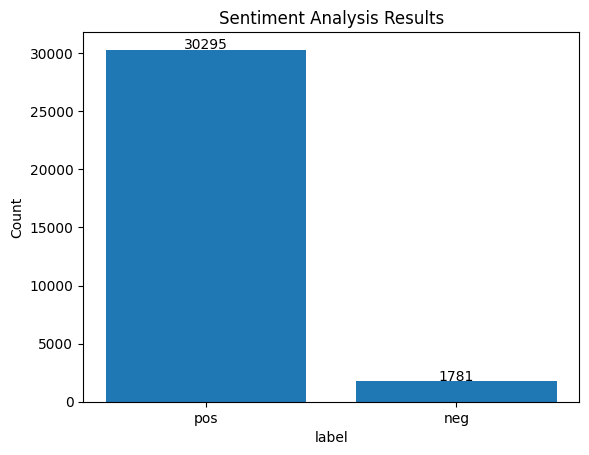

In [31]:
counts = df['label'].value_counts()
plt.bar(counts.index, counts.values)

for i, count in enumerate(counts.values):
    plt.text(i, count+50, str(count), ha='center')

plt.xlabel('label')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')

plt.show()

Top Positive Sentiments

In [32]:
sorted_pos_sent = df[df['label']=='pos'].sort_values(by='pos', ascending=False)
sorted_pos_sent[['Text',
                 'pos',
                 'neg',
                 'compound',
                 'label']].head()

,Text,pos,neg,compound,label
14014,I love chatGPT.🤍,0.8080,0.0,0.63690,pos
15858,i love chatgpt,0.8080,0.0,0.63690,pos
23943,ChatGPT i love u,0.8080,0.0,0.63690,pos
9992,@WatcherGuru Alright LFG ChatGPT I like it! lol 🔥,0.7725,0.0,0.50315,pos
7714,ChatGPT's greatest asset: https://t.co/ccHO5tU7dH,0.7700,0.0,0.77170,pos


Top Negative Sentiments

In [33]:
sorted_neg_sent = df[df['label']=='neg'].sort_values(by='neg', ascending=False)
sorted_neg_sent[['Text',
                 'pos',
                 'neg',
                 'compound',
                 'label']].head()

,Text,pos,neg,compound,label
30171,chatgpt IS HELLA SCARY WTF,0.0,0.777,-0.9094,neg
18909,scary\n#ChatGPT,0.0,0.762,-0.4939,neg
10824,Stop bullying #ChatGPT https://t.co/xuqhZrph3I,0.0,0.753,-0.7269,neg
11014,ChatGPT exposes World War III Scam https://t.c...,0.0,0.695,-0.8442,neg
27773,That ChatGPT shit is crazy,0.0,0.667,-0.7184,neg


In [34]:
chatgpt2_train=df[:20000]
chatgpt2_test=df[20000:]



In [35]:
train_labels = [1 if sentiment=='pos' else 0 for sentiment in chatgpt2_train['label']]
test_labels = [1 if sentiment=='pos' else 0 for sentiment in chatgpt2_test['label']]
print (len(train_labels), len(test_labels))

20000 12076


Logistic Regression for sentiment analysis

UniGram bag-of-words features

In [37]:
import sklearn

In [38]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,1))
tf_features_train = vectorizer.fit_transform(chatgpt2_train['Text'])
tf_features_test = vectorizer.transform(chatgpt2_test['Text'])


clf = sklearn.linear_model.LogisticRegression()
clf.fit(tf_features_train, train_labels)
print (clf)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['neg', 'pos']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

LogisticRegression()
              precision    recall  f1-score   support

         neg       0.65      0.18      0.28       661
         pos       0.95      0.99      0.97     11415

    accuracy                           0.95     12076
   macro avg       0.80      0.59      0.63     12076
weighted avg       0.94      0.95      0.94     12076

[[  120   541]
 [   65 11350]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['neg', 'pos']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

              precision    recall  f1-score   support

         neg       0.65      0.18      0.28       661
         pos       0.95      0.99      0.97     11415

    accuracy                           0.95     12076
   macro avg       0.80      0.59      0.63     12076
weighted avg       0.94      0.95      0.94     12076

[[  120   541]
 [   65 11350]]


Unigrams + Bigrams

In [40]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,2))
tf_features_train = vectorizer.fit_transform(chatgpt2_train['Text'])
tf_features_test = vectorizer.transform(chatgpt2_test['Text'])


clf = sklearn.linear_model.LogisticRegression()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['neg', 'pos']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

              precision    recall  f1-score   support

         neg       0.77      0.14      0.24       661
         pos       0.95      1.00      0.97     11415

    accuracy                           0.95     12076
   macro avg       0.86      0.57      0.61     12076
weighted avg       0.94      0.95      0.93     12076

[[   92   569]
 [   28 11387]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Unigrams + Bigrams + Trigrams

In [41]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(chatgpt2_train['Text'])
tf_features_test = vectorizer.transform(chatgpt2_test['Text'])

clf = sklearn.linear_model.LogisticRegression()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['neg', 'pos']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

              precision    recall  f1-score   support

         neg       0.87      0.11      0.20       661
         pos       0.95      1.00      0.97     11415

    accuracy                           0.95     12076
   macro avg       0.91      0.55      0.59     12076
weighted avg       0.95      0.95      0.93     12076

[[   73   588]
 [   11 11404]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Support Vector Machine (LSVM) for sentiment analysis

UniGrams

In [42]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,1))
tf_features_train = vectorizer.fit_transform(chatgpt2_train['Text'])
tf_features_test = vectorizer.transform(chatgpt2_test['Text'])

clf = sklearn.svm.LinearSVC()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['neg', 'pos']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

              precision    recall  f1-score   support

         neg       0.55      0.42      0.48       661
         pos       0.97      0.98      0.97     11415

    accuracy                           0.95     12076
   macro avg       0.76      0.70      0.72     12076
weighted avg       0.94      0.95      0.95     12076

[[  278   383]
 [  230 11185]]


UniGrams + BiGrams

In [43]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,2))
tf_features_train = vectorizer.fit_transform(chatgpt2_train['Text'])
tf_features_test = vectorizer.transform(chatgpt2_test['Text'])

clf = sklearn.svm.LinearSVC()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['neg', 'pos']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

              precision    recall  f1-score   support

         neg       0.65      0.25      0.36       661
         pos       0.96      0.99      0.97     11415

    accuracy                           0.95     12076
   macro avg       0.80      0.62      0.67     12076
weighted avg       0.94      0.95      0.94     12076

[[  162   499]
 [   87 11328]]


UniGrams + BiGrams + TriGrams

In [44]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(chatgpt2_train['Text'])
tf_features_test = vectorizer.transform(chatgpt2_test['Text'])

clf = sklearn.svm.LinearSVC()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['neg', 'pos']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

              precision    recall  f1-score   support

         neg       0.68      0.18      0.28       661
         pos       0.95      1.00      0.97     11415

    accuracy                           0.95     12076
   macro avg       0.82      0.59      0.63     12076
weighted avg       0.94      0.95      0.94     12076

[[  116   545]
 [   54 11361]]


Naive Bayes for sentiment analysis

UniGram

In [45]:
from sklearn.naive_bayes import MultinomialNB

vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,1))
tf_features_train = vectorizer.fit_transform(chatgpt2_train['Text'])
tf_features_test = vectorizer.transform(chatgpt2_test['Text'])

clf = MultinomialNB()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['neg', 'pos']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

              precision    recall  f1-score   support

         neg       0.85      0.04      0.08       661
         pos       0.95      1.00      0.97     11415

    accuracy                           0.95     12076
   macro avg       0.90      0.52      0.53     12076
weighted avg       0.94      0.95      0.92     12076

[[   28   633]
 [    5 11410]]


Unigram+BiGrams

In [46]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,2))
tf_features_train = vectorizer.fit_transform(chatgpt2_train['Text'])
tf_features_test = vectorizer.transform(chatgpt2_test['Text'])

clf = MultinomialNB()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['neg', 'pos']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))

              precision    recall  f1-score   support

         neg       1.00      0.05      0.09       661
         pos       0.95      1.00      0.97     11415

    accuracy                           0.95     12076
   macro avg       0.97      0.52      0.53     12076
weighted avg       0.95      0.95      0.92     12076

[[   30   631]
 [    0 11415]]


UniGrams + BiGrams + TriGrams

In [47]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(binary=False,ngram_range=(1,3))
tf_features_train = vectorizer.fit_transform(chatgpt2_train['Text'])
tf_features_test = vectorizer.transform(chatgpt2_test['Text'])

clf = MultinomialNB()
clf.fit(tf_features_train, train_labels)

predictions = clf.predict(tf_features_test)
print(sklearn.metrics.classification_report(test_labels, predictions, target_names=['neg', 'pos']))
print(sklearn.metrics.confusion_matrix(test_labels, predictions, labels=[0, 1]))


              precision    recall  f1-score   support

         neg       0.93      0.06      0.11       661
         pos       0.95      1.00      0.97     11415

    accuracy                           0.95     12076
   macro avg       0.94      0.53      0.54     12076
weighted avg       0.95      0.95      0.93     12076

[[   39   622]
 [    3 11412]]
